In [33]:
import sys, os
if '..' not in sys.path:
    sys.path.append('..')
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tutorials.utils.plotting import breakdown
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import *
from matplotlib.lines import Line2D

%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Ben\\Documents\\ai_taxes\\notebooks'

In [3]:
with open('../experiments/malthusian_open_borders/logs/dense_log.pickle', 'rb') as f:
    logs = pickle.load(f)
    
with open('../experiments/malthusian_open_borders/logs/mixing_weights.pickle', 'rb') as f:
    mixing = pickle.load(f)

In [4]:
mixing

{'foo_land': 0.8, 'bar_land': 0.2}

_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 _____|_ Agent  3 _____|_ Agent  4 _____|_ Agent  5 ____
Cost (Wood)    :   2.88 (n= 16) |   1.33 (n=  3) |   1.61 (n= 18) |    ~~~~~~~~    |   2.11 (n= 28) |   1.56 (n= 27)
Cost (Stone)   :   1.75 (n=  4) |   2.00 (n=  2) |   1.25 (n= 28) |   1.18 (n= 22) |   1.53 (n= 19) |    ~~~~~~~~   

Income (Wood)  :   2.04 (n= 24) |   0.20 (n= 10) |   1.83 (n= 18) |    ~~~~~~~~    |   2.87 (n= 23) |   1.76 (n= 17)
Income (Stone) :   1.33 (n=  3) |   0.88 (n=  8) |   1.42 (n= 19) |   1.40 (n= 20) |   1.35 (n= 23) |   2.00 (n=  2)
Income (Build) :  17.65 (n=  1) |    ~~~~~~~~    |  14.08 (n=  4) |    ~~~~~~~~    |  10.87 (n=  2) |    ~~~~~~~~   


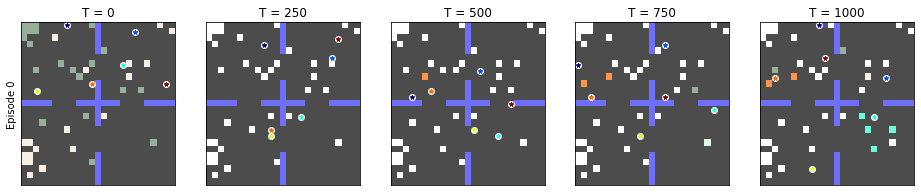

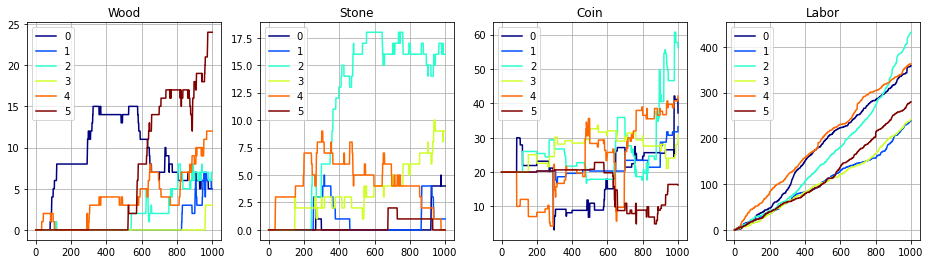

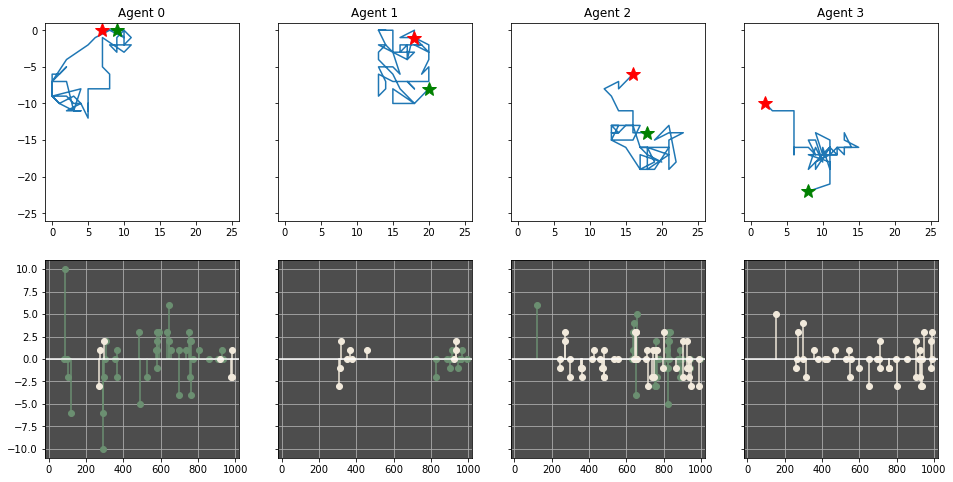

In [5]:
(fig0, fig1, fig2), incomes, endows, c_trades, all_builds, _report = breakdown(logs)

In [6]:
logs.keys()

dict_keys(['world', 'states', 'actions', 'rewards', 'Build', 'Trade', 'Gather', 'Citizenship', 'PeriodicTax'])

In [70]:
logs['PeriodicTax'][99]

{'schedule': {'foo_land': [0.0,
   0.45,
   0.15000000000000002,
   0.9,
   0.2,
   0.05,
   0.5],
  'bar_land': [0.35000000000000003, 0.2, 0.0, 0.55, 0.0, 0.5, 0.0]},
 'cutoffs': [0.0, 9.7, 39.475, 84.2, 160.725, 204.1, 510.3],
 '0': {'income': 10.0,
  'tax_paid': 0.13500000000000031,
  'marginal_rate': 0.45,
  'effective_rate': 0.013500000000000031,
  'lump_sum': 0.0450000000000001},
 '1': {'income': 0.0,
  'tax_paid': 0.0,
  'marginal_rate': 0.35000000000000003,
  'effective_rate': 0.0,
  'lump_sum': 0.0},
 '2': {'income': 0.0,
  'tax_paid': 0.0,
  'marginal_rate': 0.35000000000000003,
  'effective_rate': 0.0,
  'lump_sum': 0.0},
 '3': {'income': 0.0,
  'tax_paid': 0.0,
  'marginal_rate': 0.0,
  'effective_rate': 0.0,
  'lump_sum': 0.0450000000000001},
 '4': {'income': -10.0,
  'tax_paid': 0.0,
  'marginal_rate': 0.0,
  'effective_rate': 0.0,
  'lump_sum': 0.0450000000000001},
 '5': {'income': 0.0,
  'tax_paid': 0.0,
  'marginal_rate': 0.35000000000000003,
  'effective_rate': 0.0,
 

In [71]:
tax_schedules = [(l['schedule'], l['cutoffs'])  for l in logs['PeriodicTax'] if len(l) > 0]

In [8]:
df = dict(step=[], agent=[], inventory_coin=[], inventory_stone=[], inventory_wood=[], labor=[], skill=[], nation=[],
          nation_idx=[], income=[], tax_paid=[], marginal_rate=[], effective_rate=[], lump_sum=[])

In [9]:
for i, s in enumerate(logs['states']):
    for agent, agent_s in s.items():
        if agent != 'p':
            df['step'].append(i)
            df['agent'].append(agent)
            df['inventory_coin'].append(agent_s['inventory']['Coin'])
            df['inventory_stone'].append(agent_s['inventory']['Stone'])
            df['inventory_wood'].append(agent_s['inventory']['Wood'])
            df['labor'].append(agent_s['endogenous']['Labor'])
            df['skill'].append(agent_s['build_skill'])
            df['nation'].append(agent_s['nation'])
            df['nation_idx'].append(agent_s['nation_idx'])
            if i > 0 and isinstance(s['p']['taxes'][-1], dict):
                taxes = s['p']['taxes'][-1][agent]
                df['income'].append(taxes['income'])
                df['tax_paid'].append(taxes['tax_paid'])
                df['marginal_rate'].append(taxes['marginal_rate'])
                df['effective_rate'].append(taxes['effective_rate'])
                df['lump_sum'].append(taxes['lump_sum'])
            else:
                df['income'].append(np.nan)
                df['tax_paid'].append(np.nan)
                df['marginal_rate'].append(np.nan)
                df['effective_rate'].append(np.nan)
                df['lump_sum'].append(np.nan)

In [10]:
df = pd.DataFrame(df)

In [43]:
df['net_income'] = df['income'] - df['tax_paid'] + df['lump_sum']

In [11]:
df.dropna().groupby(['nation', 'step'])['skill'].describe()

count      mean       std       min       25%       50%  \
nation   step                                                            
bar_land 100     3.0  0.280555  0.172820  0.159103  0.181629  0.204154   
         200     3.0  0.280555  0.172820  0.159103  0.181629  0.204154   
         300     3.0  0.280555  0.172820  0.159103  0.181629  0.204154   
         400     3.0  0.280555  0.172820  0.159103  0.181629  0.204154   
         500     3.0  0.280555  0.172820  0.159103  0.181629  0.204154   
         600     3.0  0.280555  0.172820  0.159103  0.181629  0.204154   
         700     3.0  0.280555  0.172820  0.159103  0.181629  0.204154   
         800     3.0  0.280555  0.172820  0.159103  0.181629  0.204154   
         900     2.0  0.181629  0.031855  0.159103  0.170366  0.181629   
         1000    2.0  0.181629  0.031855  0.159103  0.170366  0.181629   
foo_land 100     3.0  0.252330  0.182558  0.043661  0.187216  0.330771   
         200     3.0  0.252330  0.182558  0.043661  0.187216  0.330771   
         300     3.0  0.252330  0.182558  0.043661  0.187216  0.330771   
         400     3.0  0.252330  0.182558  0.043661  0.187216  0.330771   
         500     3.0  0.252330  0.182558  0.043661  0.187216  0.330771   
         600     3.0  0.252330  0.182558  0.043661  0.187216  0.330771   
         700     3.0  0.252330  0.182558  0.043661  0.187216  0.330771   
         800     3.0  0.252330  0.182558  0.043661  0.187216  0.330771   
         900     4.0  0.308849  0.187073  0.043661  0.258993  0.356664   
         1000    4.0  0.308849  0.187073  0.043661  0.258993  0.356664   

                    75%       max  
nation   step                      
bar_land 100   0.341281  0.478408  
         200   0.341281  0.478408  
         300   0.341281  0.478408  
         400   0.341281  0.478408  
         500   0.341281  0.478408  
         600   0.341281  0.478408  
         700   0.341281  0.478408  
         800   0.341281  0.478408  
         900   0.192891  0.204154  
         1000  0.192891  0.204154  
foo_land 100   0.356664  0.382557  
         200   0.356664  0.382557  
         300   0.356664  0.382557  
         400   0.356664  0.382557  
         500   0.356664  0.382557  
         600   0.356664  0.382557  
         700   0.356664  0.382557  
         800   0.356664  0.382557  
         900   0.406520  0.478408  
         1000  0.406520  0.478408

In [78]:

def update(val=0.0):
    fig, ax = plt.subplots()
    plt.title('Distribution of skill')
    step = val * 100
    grp = df.dropna()
    grp = grp.loc[grp['step'] == step, ['skill', 'nation_idx']]
    c = grp['nation_idx'].values
    c = ['r' if _c == 0 else 'b' for _c in c]
    grp['nation_idx'] = (grp['nation_idx'] * 2 - 1)
    offsets = grp[['nation_idx', 'skill']].values
    sizes = grp['skill'].values * 100
    ax.scatter(offsets[:, 0], offsets[:, 1], s=sizes, c=c)
    scat.set_sizes(sizes)
    custom_lines = [Line2D([0], [0], color='r', lw=4), Line2D([0], [0], color='b', lw=4)]
    ax.legend(custom_lines, ['Foo Land {}'.format(mixing['foo_land']), 'Bar Land {}'.format(mixing['bar_land'])], loc='center')

interact(update, val=widgets.IntSlider(min=1, max=10));

interactive(children=(IntSlider(value=1, description='val', max=10, min=1), Output()), _dom_classes=('widget-i…

In [80]:
def update(val=1.0):
    fig, ax = plt.subplots(figsize= (17,8))
    plt.title('Distribution of Net Income (Sized by Skill)')
    step = val * 100
    grp = df.dropna()
    grp = grp.loc[grp['step'] == step, ['net_income', 'nation_idx', 'skill']]
    c = grp['nation_idx'].values
    total_income_foo = grp.loc[grp['nation_idx'] == 0, 'net_income'].sum().round(2)
    total_income_bar = grp.loc[grp['nation_idx'] == 1, 'net_income'].sum().round(2)
    c = ['r' if _c == 0 else 'b' for _c in c]
    grp['nation_idx'] = (grp['nation_idx'] * 2 - 1)
    offsets = grp[['nation_idx', 'net_income']].values
    sizes = grp['skill'].values * 100
    ax.scatter(offsets[:, 0], offsets[:, 1], s=sizes, c=c)
    scat.set_sizes(sizes)
    custom_lines = [Line2D([0], [0], color='r', lw=4), Line2D([0], [0], color='b', lw=4)]
    ax.legend(custom_lines, ['Foo Land\n-Equality Weight: {}\n-Total Income: {}'.format(mixing['foo_land'], total_income_foo),
                             'Bar Land\n-Equality Weight: {}\n-Total Income: {}'.format(mixing['bar_land'], total_income_bar)], loc='center')

interact(update, val=widgets.IntSlider(min=1, max=10));

interactive(children=(IntSlider(value=1, description='val', max=10, min=1), Output()), _dom_classes=('widget-i…

In [62]:
tax_schedules[0]

{'foo_land': [0.0, 0.45, 0.15000000000000002, 0.9, 0.2, 0.05, 0.5],
 'bar_land': [0.35000000000000003, 0.2, 0.0, 0.55, 0.0, 0.5, 0.0]}

In [77]:
def update(val=0):
    x = np.arange(7)
    width = 0.35
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.bar(x - width/2, tax_schedules[val][0]['foo_land'], width, label='Foo Land')
    ax.bar(x + width/2, tax_schedules[val][0]['bar_land'], width, label='Bar Land')
    ax.set_ylabel('Tax Rate')
    ax.set_title('Tax Schedule by Country')
    ax.set_xticks(x)
    ax.set_xticklabels(tax_schedules[val][1])
    ax.set_xlabel('Income Cutoff')
    ax.legend()
interact(update, val=widgets.IntSlider(min=0, max=len(tax_schedules) - 1));

interactive(children=(IntSlider(value=0, description='val', max=9), Output()), _dom_classes=('widget-interact'…

In [ ]:
def update(val=1.0):
    fig, ax = plt.subplots()
    plt.title('Distribution of Net Income (Sized by Skill)')
    step = val * 100
    grp = df.dropna()
    grp = grp.loc[grp['step'] == step, ['net_income', 'nation_idx', 'skill']]
    c = grp['nation_idx'].values
    total_income_foo = grp.loc[grp['nation_idx'] == 0, 'net_income'].sum().round(2)
    total_income_bar = grp.loc[grp['nation_idx'] == 1, 'net_income'].sum().round(2)
    c = ['r' if _c == 0 else 'b' for _c in c]
    grp['nation_idx'] = (grp['nation_idx'] * 2 - 1)
    offsets = grp[['nation_idx', 'net_income']].values
    sizes = grp['skill'].values * 100
    ax.scatter(offsets[:, 0], offsets[:, 1], s=sizes, c=c)
    scat.set_sizes(sizes)
    custom_lines = [Line2D([0], [0], color='r', lw=4), Line2D([0], [0], color='b', lw=4)]
    ax.legend(custom_lines, ['Foo Land\n-Equality Weight: {}\n-Total Income: {}'.format(mixing['foo_land'], total_income_foo),
                             'Bar Land\n-Equality Weight: {}\n-Total Income: {}'.format(mixing['bar_land'], total_income_bar)], loc='center')

interact(update, val=widgets.IntSlider(min=1, max=10));

In [84]:
df.loc[df['agent'] == '4'].dropna()

,step,agent,inventory_coin,inventory_stone,inventory_wood,labor,skill,nation,nation_idx,income,tax_paid,marginal_rate,effective_rate,lump_sum,net_income
604,100,4,10.045000,0.0,0.0,44.75,0.043661,foo_land,0,-10.000000,0.000000,0.00,0.000000,0.045000,-9.955000
1204,200,4,5.295000,3.0,0.0,82.50,0.043661,foo_land,0,-3.000000,0.000000,0.00,0.000000,1.250000,-1.750000
1804,300,4,18.698333,5.0,1.0,119.00,0.043661,foo_land,0,14.000000,5.595000,0.85,0.399643,1.998333,10.403333
2404,400,4,20.698333,1.0,0.0,158.50,0.043661,foo_land,0,2.000000,1.400000,0.70,0.700000,1.400000,2.000000
3004,500,4,28.327141,0.0,0.0,201.75,0.043661,foo_land,0,14.873211,11.316605,0.50,0.760872,4.072202,7.628807
3604,600,4,25.727141,1.0,0.0,230.50,0.043661,foo_land,0,-4.000000,0.000000,0.00,0.000000,1.400000,-2.600000
4204,700,4,21.948685,0.0,2.0,276.00,0.043661,foo_land,0,-5.126789,0.000000,0.00,0.000000,1.348333,-3.778456
4804,800,4,36.522018,0.0,0.0,304.25,0.043661,foo_land,0,17.000000,3.640000,0.10,0.214118,1.213333,14.573333
5404,900,4,37.709518,0.0,4.0,330.50,0.043661,foo_land,0,2.000000,1.300000,0.65,0.650000,0.487500,1.187500
6004,1000,4,42.149022,0.0,8.0,362.75,0.043661,foo_land,0,3.000000,1.200000,0.40,0.400000,2.639504,4.439504


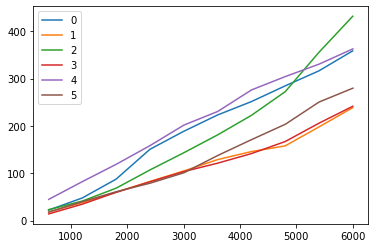

In [97]:
fig, ax = plt.subplots()
legend = []
for key, grp in df.dropna().groupby('agent'):
    legend.append(key)
    ax.plot(grp['labor'])
plt.legend(legend)
# Low skill workers are incentivized to work in socialist country, disencentivized in capatilist

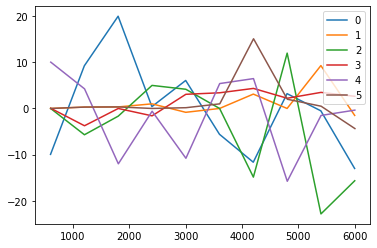

In [102]:
fig, ax = plt.subplots()
legend = []
for key, grp in df.dropna().groupby('agent'):
    legend.append(key)
    ax.plot(grp['lump_sum'] - grp['income'])
plt.legend(legend)
# Low skill workers are incentivized to work in socialist country, disencentivized in capatilist

In [99]:
[l['1'] for l in logs['actions']]

[{'ContinuousDoubleAuction.Sell_Stone': 1},
 {'Gather': 2},
 {'ContinuousDoubleAuction.Sell_Stone': 9},
 {'Gather': 4},
 {'ContinuousDoubleAuction.Sell_Wood': 4},
 {'ContinuousDoubleAuction.Sell_Wood': 2},
 {'ContinuousDoubleAuction.Sell_Wood': 6},
 {'ContinuousDoubleAuction.Sell_Stone': 1},
 {'ContinuousDoubleAuction.Sell_Wood': 4},
 {'Gather': 4},
 {'ContinuousDoubleAuction.Sell_Stone': 2},
 {'ContinuousDoubleAuction.Sell_Wood': 4},
 {},
 {'ContinuousDoubleAuction.Sell_Wood': 7},
 {'Gather': 2},
 {'ContinuousDoubleAuction.Sell_Stone': 5},
 {},
 {},
 {'ContinuousDoubleAuction.Sell_Stone': 10},
 {'ContinuousDoubleAuction.Sell_Stone': 9},
 {'Gather': 1},
 {'ContinuousDoubleAuction.Sell_Stone': 1},
 {'Gather': 1},
 {'ContinuousDoubleAuction.Sell_Wood': 9},
 {'ContinuousDoubleAuction.Sell_Wood': 7},
 {'ContinuousDoubleAuction.Sell_Wood': 2},
 {'Gather': 1},
 {'ContinuousDoubleAuction.Sell_Wood': 5},
 {'ContinuousDoubleAuction.Sell_Stone': 11},
 {'ContinuousDoubleAuction.Sell_Stone': 6},
 

In [100]:
[l['4'] for l in logs['actions']]

[{'ContinuousDoubleAuction.Sell_Stone': 8},
 {'ContinuousDoubleAuction.Sell_Stone': 7},
 {'ContinuousDoubleAuction.Sell_Wood': 1},
 {'ContinuousDoubleAuction.Sell_Wood': 6},
 {'ContinuousDoubleAuction.Sell_Stone': 6},
 {'ContinuousDoubleAuction.Sell_Stone': 8},
 {'ContinuousDoubleAuction.Sell_Wood': 1},
 {'ContinuousDoubleAuction.Sell_Stone': 1},
 {'Gather': 3},
 {'Gather': 2},
 {'ContinuousDoubleAuction.Sell_Stone': 2},
 {'ContinuousDoubleAuction.Sell_Wood': 7},
 {'ContinuousDoubleAuction.Sell_Stone': 9},
 {'ContinuousDoubleAuction.Sell_Stone': 6},
 {'Gather': 1},
 {'ContinuousDoubleAuction.Sell_Wood': 7},
 {'Gather': 4},
 {'ContinuousDoubleAuction.Sell_Stone': 8},
 {'ContinuousDoubleAuction.Sell_Stone': 1},
 {'ContinuousDoubleAuction.Sell_Wood': 7},
 {'Gather': 3},
 {'ContinuousDoubleAuction.Sell_Stone': 5},
 {'ContinuousDoubleAuction.Sell_Wood': 7},
 {'ContinuousDoubleAuction.Sell_Wood': 5},
 {'ContinuousDoubleAuction.Sell_Stone': 11},
 {'Gather': 2},
 {'ContinuousDoubleAuction.Sell

In [87]:
df.groupby('agent').describe()[['labor',  'skill', 'income', 'tax_paid', 'effective_rate', 'lump_sum']]

labor                                                               \
        count        mean         std  min     25%     50%     75%     max   
agent                                                                        
0      1001.0  175.458791  108.850457  0.0   65.00  188.50  271.00  358.50   
1      1001.0  105.432318   64.358682  0.0   46.00  104.75  150.75  238.50   
2      1001.0  161.533966  119.900307  0.0   56.25  143.25  242.25  431.75   
3      1001.0  105.039710   67.462923  0.0   47.25  103.50  151.00  241.50   
4      1001.0  191.286963  105.967377  0.0  100.25  201.75  295.00  362.75   
5      1001.0  119.421329   82.634186  0.0   51.00  101.00  187.25  279.75   

        skill            ... effective_rate           lump_sum            \
        count      mean  ...            75%       max    count      mean   
agent                    ...                                               
0      1001.0  0.382557  ...       0.554753  0.700000     10.0  1.585421   
1      1001.0  0.159103  ...       0.000000  0.500000     10.0  1.270727   
2      1001.0  0.204154  ...       0.406435  0.519167     10.0  1.270727   
3      1001.0  0.330771  ...       0.575000  0.900000     10.0  1.585421   
4      1001.0  0.043661  ...       0.587500  0.760872     10.0  1.585421   
5      1001.0  0.478408  ...       0.000000  0.400000     10.0  0.704200   

                                                              
            std    min     25%       50%       75%       max  
agent                                                         
0      1.126446  0.045  1.2225  1.374167  1.848750  4.072202  
1      2.340236  0.000  0.0000  0.233333  1.203256  7.299038  
2      2.340236  0.000  0.0000  0.233333  1.203256  7.299038  
3      1.126446  0.045  1.2225  1.374167  1.848750  4.072202  
4      1.126446  0.045  1.2225  1.374167  1.848750  4.072202  
5      1.163222  0.000  0.0000  0.233333  0.448958  3.115000  

[6 rows x 48 columns]

In [82]:
df.dropna()

,step,agent,inventory_coin,inventory_stone,inventory_wood,labor,skill,nation,nation_idx,income,tax_paid,marginal_rate,effective_rate,lump_sum,net_income
600,100,0,29.910000,0.0,4.0,22.00,0.382557,foo_land,0,10.000000,0.135000,0.45,0.013500,0.045000,9.910000
601,100,1,20.000000,0.0,0.0,18.00,0.159103,bar_land,1,0.000000,0.000000,0.35,0.000000,0.000000,0.000000
602,100,2,20.000000,0.0,0.0,23.00,0.204154,bar_land,1,0.000000,0.000000,0.35,0.000000,0.000000,0.000000
603,100,3,20.045000,0.0,0.0,14.00,0.330771,foo_land,0,0.000000,0.000000,0.00,0.000000,0.045000,0.045000
604,100,4,10.045000,0.0,0.0,44.75,0.043661,foo_land,0,-10.000000,0.000000,0.00,0.000000,0.045000,-9.955000
605,100,5,20.000000,0.0,0.0,18.00,0.478408,bar_land,1,0.000000,0.000000,0.35,0.000000,0.000000,0.000000
1200,200,0,18.160000,0.0,5.0,47.75,0.382557,foo_land,0,-8.000000,0.000000,0.00,0.000000,1.250000,-6.750000
1201,200,1,20.300000,0.0,0.0,38.00,0.159103,bar_land,1,0.000000,0.000000,0.15,0.000000,0.300000,0.300000
1202,200,2,25.400000,0.0,0.0,41.25,0.204154,bar_land,1,6.000000,0.900000,0.15,0.150000,0.300000,5.400000
1203,200,3,22.545000,0.0,0.0,34.75,0.330771,foo_land,0,5.000000,3.750000,0.75,0.750000,1.250000,2.500000


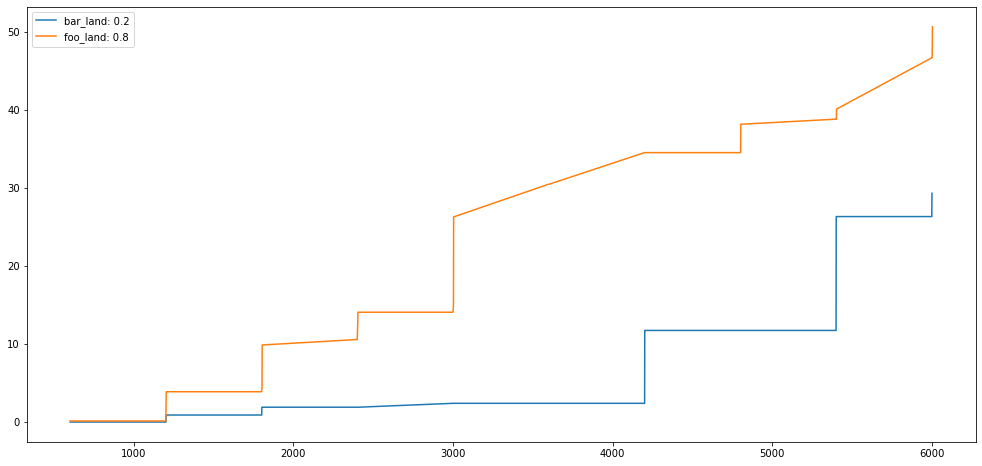

In [60]:
fig, ax = plt.subplots(figsize=(17, 8))
legend = []
for key, grp in df.dropna().groupby('nation'):
    ax.plot(grp.cumsum()['tax_paid'])
    legend.append(f'{key}: {mixing[key]}')
plt.legend(legend)

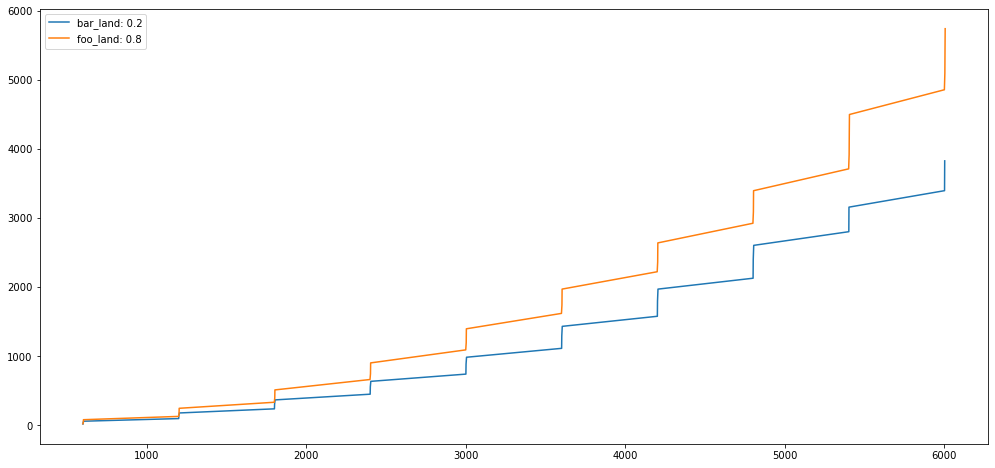

In [61]:
fig, ax = plt.subplots(figsize=(17, 8))
legend = []
for key, grp in df.dropna().groupby('nation'):
    ax.plot(grp.cumsum()['labor'])
    legend.append(f'{key}: {mixing[key]}')
plt.legend(legend)

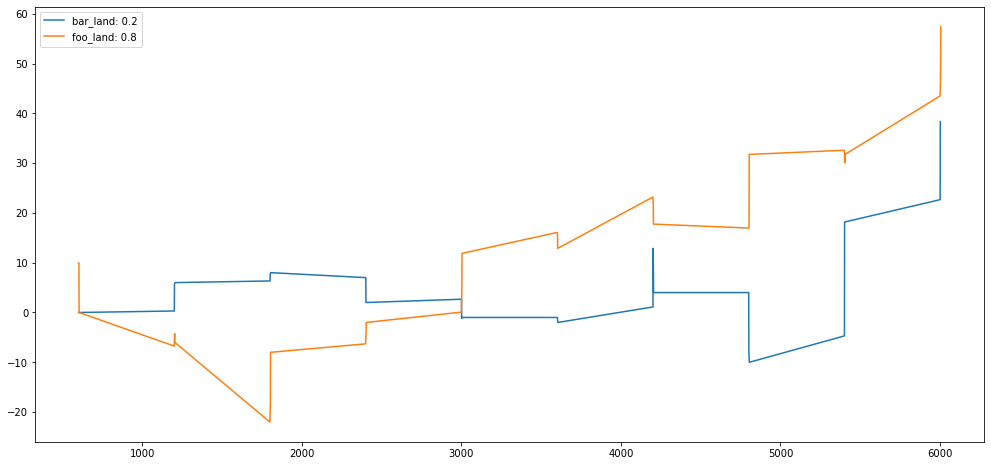

In [62]:
fig, ax = plt.subplots(figsize=(17, 8))
legend = []
for key, grp in df.dropna().groupby('nation'):
    ax.plot(grp.cumsum()['net_income'])
    legend.append(f'{key}: {mixing[key]}')
plt.legend(legend)

In [63]:
planner_rewards = pd.DataFrame([r['p'] for r in logs['rewards']])

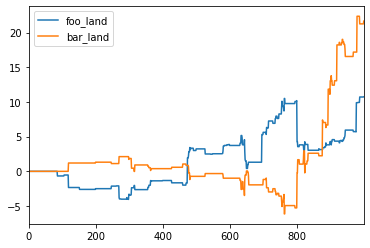

In [64]:
planner_rewards.cumsum().plot()

In [65]:
agent_rewards = pd.DataFrame(logs['rewards']).drop('p', 1)

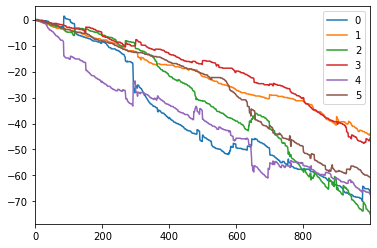

In [66]:
agent_rewards.cumsum().plot()